In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
import statsmodels.graphics.tsaplots as tsaplt
from scipy import stats
seaborn.set()

案例一

In [2]:
data = pd.read_csv('C:\\Users\\poposoto\\Desktop\\model\\808\\时序案例1.csv')
data.index = range(1500, 1970)

1时序图

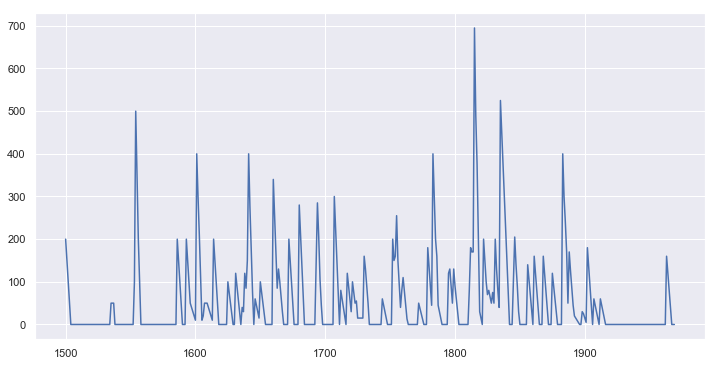

In [3]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data);

2模型定阶

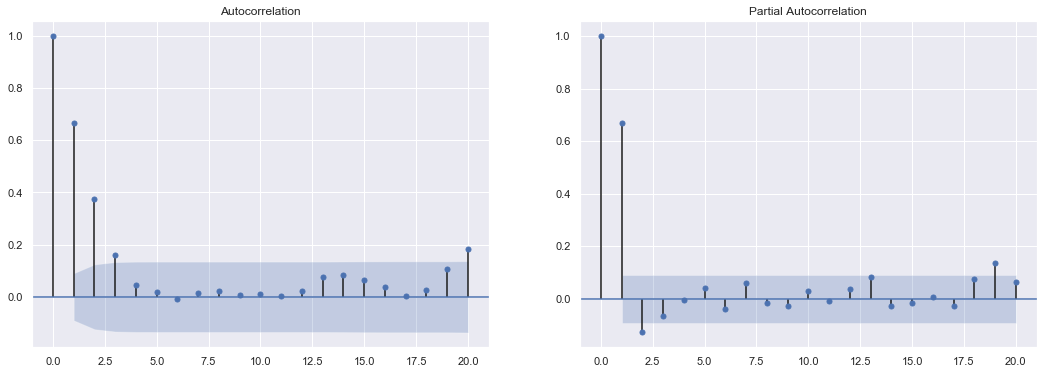

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
tsaplt.plot_acf(data, lags=20, ax=ax[0])
tsaplt.plot_pacf(data, lags=20, ax=ax[1]);

3参数估计

In [5]:
try:
    model1 = tsa.ARIMA(data, order=(2, 0, 0)).fit()
    print(model1.summary())
except:
    print('error')

                              ARMA Model Results                              
Dep. Variable:                      x   No. Observations:                  470
Model:                     ARMA(2, 0)   Log Likelihood               -2662.544
Method:                       css-mle   S.D. of innovations             69.783
Date:                Thu, 08 Aug 2019   AIC                           5333.088
Time:                        14:52:38   BIC                           5349.699
Sample:                             0   HQIC                          5339.623
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.5233      8.596      6.692      0.000      40.676      74.371
ar.L1.x        0.7533      0.046     16.465      0.000       0.664       0.843
ar.L2.x       -0.1268      0.046     -2.769      0.0

In [6]:
try:
    model2 = tsa.ARIMA(data, order=(0, 0, 3)).fit()
    print(model2.summary())
except:
    print('error')

                              ARMA Model Results                              
Dep. Variable:                      x   No. Observations:                  470
Model:                     ARMA(0, 3)   Log Likelihood               -2661.694
Method:                       css-mle   S.D. of innovations             69.655
Date:                Thu, 08 Aug 2019   AIC                           5333.388
Time:                        14:52:38   BIC                           5354.152
Sample:                             0   HQIC                          5341.557
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.4575      7.653      7.507      0.000      42.457      72.458
ma.L1.x        0.7438      0.045     16.352      0.000       0.655       0.833
ma.L2.x        0.4513      0.050      8.994      0.0

In [7]:
try:
    model3 = tsa.ARIMA(data, order=(2, 0, 3)).fit()
    print(model3.summary())
except:
    print('error')

error


4模型诊断

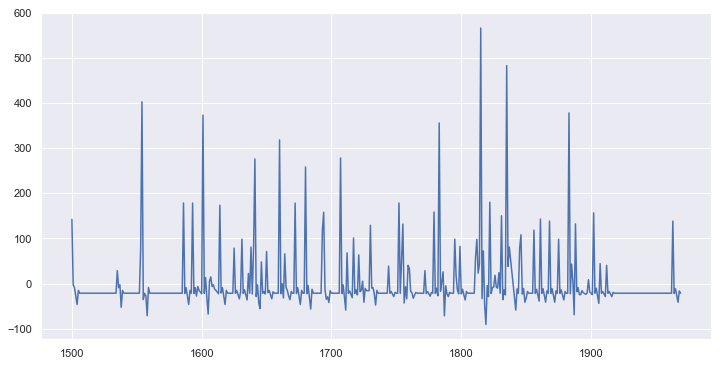

In [8]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(model1.resid);

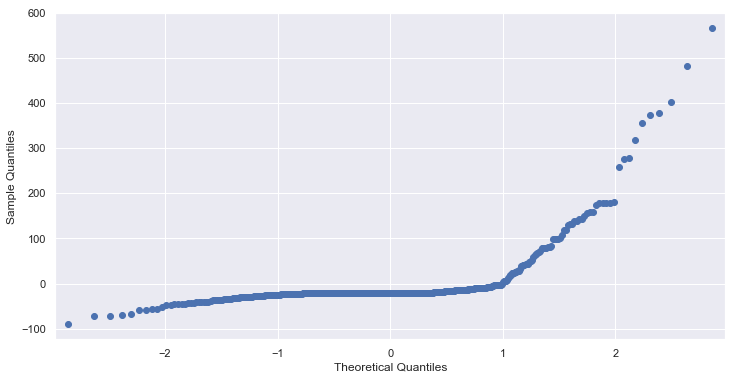

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
sm.qqplot(model1.resid, ax=ax);

In [10]:
print(stats.shapiro(model1.resid)[1]) # p-value of the Shapiro-Wilk test for normality

7.260349022357701e-35


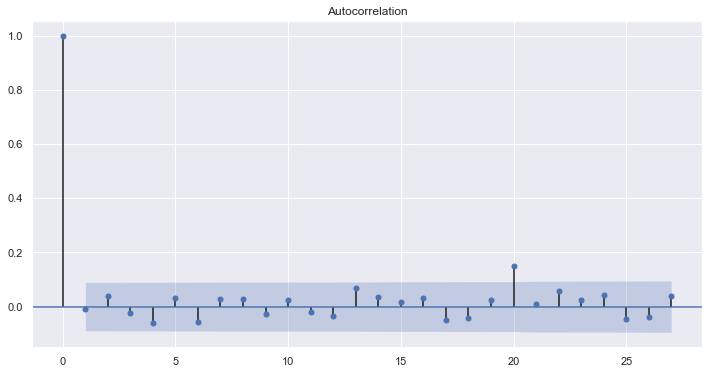

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))
tsaplt.plot_acf(model1.resid, lags=27, ax=ax);

5模型预测

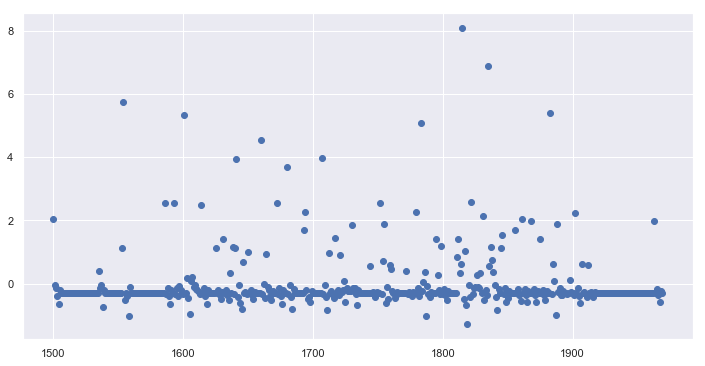

In [12]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot((model1.resid - model1.resid.mean()) / model1.resid.std(), 'o');